In [33]:
print("Hello World")

Hello World


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv("data.csv")

In [36]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [37]:
df.shape

(4600, 18)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [39]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [40]:
df.bedrooms.value_counts()

bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64

In [41]:
df.bathrooms.value_counts()

bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: count, dtype: int64

In [42]:
df.sqft_living.value_counts()

sqft_living
1940     32
1720     32
1660     31
1840     31
2000     30
         ..
2732      1
2009      1
1295      1
10040     1
2538      1
Name: count, Length: 566, dtype: int64

In [43]:
df.sqft_lot.value_counts()

sqft_lot
5000     80
6000     65
4000     54
7200     50
4800     29
         ..
3568      1
17935     1
18897     1
4674      1
8102      1
Name: count, Length: 3113, dtype: int64

In [44]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [45]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [46]:
df.iloc[:,2:6]

,bedrooms,bathrooms,sqft_living,sqft_lot
0,3.0,1.50,1340,7912
1,5.0,2.50,3650,9050
2,3.0,2.00,1930,11947
3,3.0,2.25,2000,8030
4,4.0,2.50,1940,10500
...,...,...,...,...
4595,3.0,1.75,1510,6360
4596,3.0,2.50,1460,7573
4597,3.0,2.50,3010,7014
4598,4.0,2.00,2090,6630


In [47]:
dt_mean, dt_std = np.mean(df["price"]), np.std(df["price"])
cut_off = dt_std * 3
lower, upper = dt_mean - cut_off, dt_mean + cut_off
idx = np.where((df)["price"] < lower) | (df["price"] > upper)

C:\Users\jefin\AppData\Local\Temp\ipykernel_92372\2165490494.py:4: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  idx = np.where((df)["price"] < lower) | (df["price"] > upper)


In [48]:
#filtrando os outliers do df
df[idx] 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
122,2014-05-05 00:00:00,2.280000e+06,7.0,8.00,13540,307752,3.0,0,4,3,9410,4130,1999,0,26408 NE 70th St,Redmond,WA 98053,USA
252,2014-05-07 00:00:00,3.200000e+06,7.0,4.50,6210,8856,2.5,0,2,5,4760,1450,1910,0,1230 Warren Ave N,Seattle,WA 98109,USA
404,2014-05-09 00:00:00,2.400000e+06,3.0,2.25,3000,11665,1.5,1,4,3,3000,0,2001,0,East Lake Sammamish Trail,Sammamish,WA 98075,USA
581,2014-05-13 00:00:00,2.555000e+06,4.0,2.50,5300,26211,2.0,1,2,2,4570,730,1923,0,4437 55th Ave NE,Seattle,WA 98105,USA
1132,2014-05-21 00:00:00,2.700000e+06,5.0,4.75,5305,8401,2.0,0,2,3,3745,1560,2005,0,1010 6th St W,Kirkland,WA 98033,USA
1543,2014-05-29 00:00:00,2.453500e+06,4.0,3.50,4730,13586,1.5,0,0,5,4270,460,1935,0,1404 Broadmoor Dr E,Seattle,WA 98112,USA
1567,2014-05-29 00:00:00,3.100000e+06,6.0,4.25,6980,15682,3.0,0,4,4,5330,1650,1999,0,5243 Forest Ave SE,Mercer Island,WA 98040,USA
1571,2014-05-29 00:00:00,2.750000e+06,4.0,3.25,4430,21000,2.0,0,0,3,4430,0,1952,2007,3239 78th Pl NE,Medina,WA 98039,USA
1600,2014-05-30 00:00:00,2.400000e+06,4.0,3.25,4140,20734,1.0,0,1,3,3300,840,1977,2005,9415 NE 27th St,Clyde Hill,WA 98004,USA


In [49]:
df_sem_outliers = df[~idx]

In [50]:
df_sem_outliers

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [51]:
x=df_sem_outliers.iloc[:,2:6]
y=df_sem_outliers['price']

In [52]:
#separando em treino e teste
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2 ,shuffle=True)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3652, 4)
(914, 4)
(3652,)
(914,)


In [54]:
sc = StandardScaler()
X_train_t = sc.fit_transform(X_train)

In [55]:
print(X_train_t)

[[ 0.66459918 -0.17770071  0.45908927 -0.23634819]
 [-0.43116435 -1.50346783 -1.27069506 -0.20147935]
 [ 0.66459918  1.47950819  1.32956139  0.03458951]
 ...
 [-0.43116435 -0.17770071 -0.81313921 -0.16300057]
 [-0.43116435 -1.50346783 -1.20373567 -0.26484492]
 [-1.52692787 -0.84058427 -1.22605547 -0.34661575]]


In [56]:
X_test_t = sc.transform(X_test)

In [57]:
#modelo
model_lr= LinearRegression()
model_lr.fit(X_train_t,y_train)

LinearRegression()

In [58]:
model_lr.score(X_train_t,y_train)

0.43012213261705956

In [59]:
model_lr.score(X_test_t,y_test)

0.39228889393627386

In [60]:
predictions = model_lr.predict(X_test_t)

In [61]:
residuals = y_test - predictions

In [62]:
print(residuals)

982      48856.506713
1857   -185205.262766
2785   -339159.730097
4393      -292.465494
1861    -56335.909684
            ...      
3909     28926.641172
438     103937.703676
4555   -439040.737948
7      -156979.836277
1366     14033.111944
Name: price, Length: 914, dtype: float64


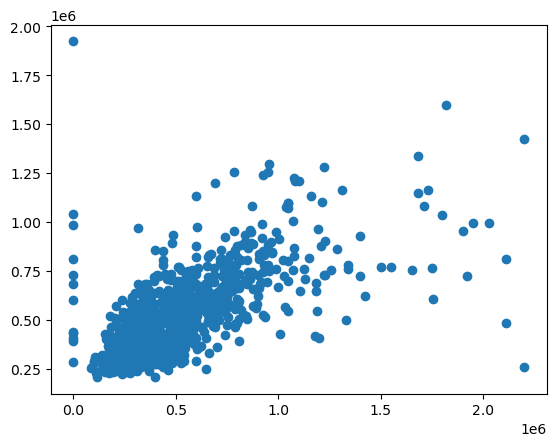

In [64]:
plt.scatter(y_test,predictions)